# AUEB M.Sc. in Data Science (part-time)

**Course**: Machine Learning and Computational Statistics

**Semester**: Winter 2018

**9th homework**

**Author**: Spiros Politis

---

Imports and globals:

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Aesthetics for plots
plt.style.use("ggplot")

plot_main_title_font = {
    "family": "sans serif",
    "color":  "black",
    "weight": "bold",
    "size": 18,
}

plot_axis_title_font = {
    "family": "sans serif",
    "color":  "black",
    "weight": "bold",
    "size": 14,
}

In [12]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

---

## Exercise 1

In mathematical optimization, **Wolfe duality** is type of dual problem in which the objective function and constraints are all differentiable functions (source: Wikipedia).

In the context of the SVM problem, what we are looking for is to identify a linear classifier of the form

$$g(\boldsymbol{x}) = \boldsymbol{\theta}^{T} \boldsymbol{x} + \theta_{0}$$

such that we achieve the maximum margin, separating the classes.

To formulate this problem, we need to define the objective function and the constraints of the problem as:

$$
min J(\boldsymbol{\theta}) = \frac{1}{2} ||\boldsymbol{\theta}||^{2}
\tag{1}
$$

subject to

$$
y_{i}(\boldsymbol{\theta}^{T} \boldsymbol{x_{i}} + \theta_{0}) \geq 1, i = 1, 2, \dots, N
\tag{2}
$$

Having to minimize $J(\boldsymbol{\theta})$, subject to the constraints mentioned, we need to formulate the problem as a **Langrangian** function, which is expressed as

$$
L(\boldsymbol{\theta}, \theta_{0}, \lambda) = \frac{1}{2} ||\boldsymbol{\theta}||^{2} - \sum_{i=1}^{N} \lambda_{i} \left[ y_{i}(\boldsymbol{\theta}^{T} \boldsymbol{x_{i} + \theta_{0}}) - 1 \right]
\tag{3}
$$

We now need to compute the partial derivates w.r.t. $\boldsymbol{\theta}$, $\theta_{0}$ of $\textbf{(3)}$:

$$
\frac{\partial L(\boldsymbol{\theta}, \theta_{0}, \lambda)}{\partial \boldsymbol{\theta}} = 
||\boldsymbol{\theta}|| - \sum_{i=1}^{N} \lambda_{i} y_{i} \boldsymbol{x}_{i}
\tag{4}
$$

$$
\frac{\partial L(\boldsymbol{\theta}, \theta_{0}, \lambda)}{\partial \theta_{0}} = 
- \sum_{i=1}^{N} \lambda_{i} y_{i}
\tag{5}
$$

Setting $\textbf{(4)}$ to zero, we get:

$$
||\boldsymbol{\theta}|| - \sum_{i=1}^{N} \lambda_{i} y_{i} \boldsymbol{x}_{i} = 0 \implies
$$

$$
||\boldsymbol{\theta}|| = \sum_{i=1}^{N} \lambda_{i} y_{i} \boldsymbol{x}_{i}
\tag{6}
$$

Setting $\textbf{(5)}$ to zero, we get:

$$
- \sum_{i=1}^{N} \lambda_{i} y_{i} = 0 \implies
$$

$$
\sum_{i=1}^{N} \lambda_{i} y_{i} = 0
\tag{7}
$$

We now need to substitute $\textbf{(6)}$ and $\textbf{(7)}$ back into $\textbf{(3)}$, thereby getting:

$$
\frac{1}{2} \left( \sum_{i=1}^{N} \lambda_{i} y_{i} \boldsymbol{x}_{i} \right) \left( \sum_{i=1}^{N} \lambda_{i} y_{i} \boldsymbol{x}_{i} \right) - \left( \sum_{i=1}^{N} \lambda_{i} y_{i} \boldsymbol{x}_{i} \right) \left( \sum_{i=1}^{N} \lambda_{i} y_{i} \boldsymbol{x}_{i} \right) - \left( \sum_{i=1}^{N} \lambda_{i} y_{i} \right) \left( \sum_{i=1}^{N} \lambda_{i} y_{i} \right) + \sum_{i=1}^{N} \lambda_{i} \implies
$$
$$
\sum_{i=1}^{N} \lambda_{i} - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \lambda_{i} \lambda_{j} y_{i} y_{j} \boldsymbol{x}_{i}^{T} \boldsymbol{x}_{j}
\tag{8}
$$

Therefore, the dual form of the SVM problem is represented as:

$$
max_{\lambda \geq 0} \left( \sum_{i=1}^{N} \lambda_{i} - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \lambda_{i} \lambda_{j} y_{i} y_{j} \boldsymbol{x}_{i}^{T} \boldsymbol{x}_{j} \right)
$$

subject to

$$
\sum_{i=1}^{N} \lambda_{i} y_{i} = 0
$$

$$
\boldsymbol{\lambda} \geq 0
$$

---

## Exercise 2

### Answer (a)

Define $\omega_{i}$ data points:

In [13]:
x_1 = np.array([-1, 1])
x_2 = np.array([-1, -1])
x_3 = np.array([1, -1])
x_4 = np.array([1, 1])

Plot of the data points in two-dim space:

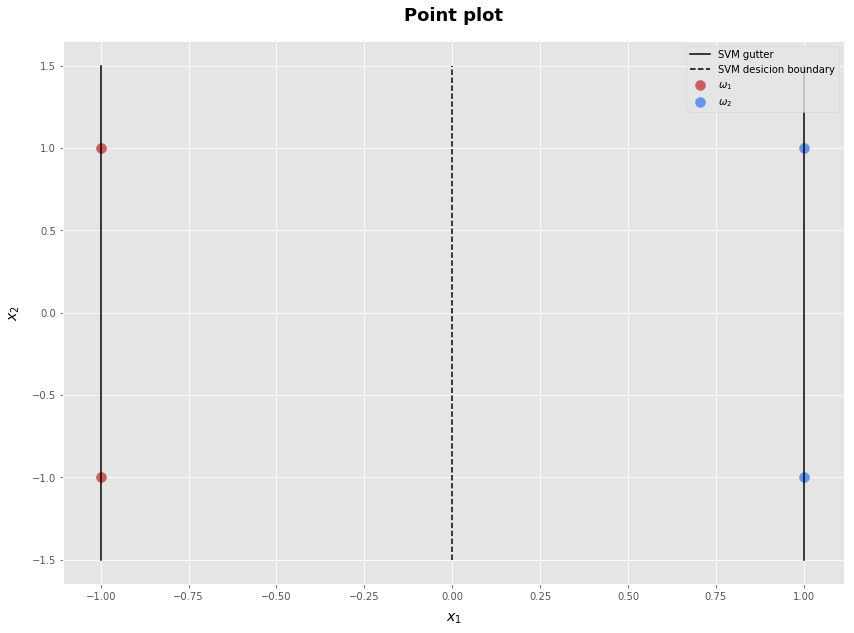

In [14]:
# Plot
fig, ax = plt.subplots(figsize = (14, 10))

ax.scatter(x_1[0], x_1[1], c = "indianred", s = 100, alpha = 1, label = "$\omega_{1}$")
ax.scatter(x_2[0], x_2[1], c = "indianred", s = 100, alpha = 1)

ax.scatter(x_3[0], x_3[1], c = "cornflowerblue", s = 100, alpha = 1, label = "$\omega_{2}$")
ax.scatter(x_4[0], x_4[1], c = "cornflowerblue", s = 100, alpha = 1)

# SVM gutters
ax.plot(np.repeat(-1, 100), np.linspace(-1.5, 1.5, 100), "k-", label = "SVM gutter")
ax.plot(np.repeat(1, 100), np.linspace(-1.5, 1.5, 100), "k-")

# SVM desicion boundary
ax.plot(np.zeros(100), np.linspace(-1.5, 1.5, 100), "k--", label = "SVM desicion boundary")

# Set graph labels
ax.set_xlabel("$x_{1}$", fontdict = plot_axis_title_font, labelpad = 10)
ax.set_ylabel("$x_{2}$", fontdict = plot_axis_title_font, labelpad = 10)

# Set graph title
ax.set_title("Point plot", fontdict = plot_main_title_font, pad = 20)

plt.legend()

pass;

Since the SVM criterion is **maximizing** the distance separating the two classes, the gutter boundaries will have to be defined by the lines passing from the two points of $\omega_{1}$ (left) and $\omega_{2}$ (right), respectively. Therefore, the linear classifier will be provided by the middle line (because we are at 2-dim space) of this space.

Since the gutter lines are $f(x) = -1$ and $f(x) = 1$ respectively, the middle line will be $f(x) = 0$.

---

### Answer (b)

Since $N = 4$, knowing $y_{1} = y_{2} = 1$, $y_{3} = y_{4} = -1$ and the values of $x_{1}$, $x_{2}$, $x_{3}$ and $x_{4}$ we calculate the following quantities:

$$
y_{1}y_{1}x_{1}^{T}x_{1} = 1 \cdot 1 \cdot 
\begin{bmatrix} 
    -1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix} 
    -1 \\ 1
\end{bmatrix} = 2
$$
$$
y_{1}y_{2}x_{1}^{T}x_{2} = 1 \cdot 1 \cdot 
\begin{bmatrix} 
    -1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix} 
    -1 \\ -1
\end{bmatrix} = 0
$$
$$
y_{1}y_{3}x_{1}^{T}x_{3} = 1 \cdot (-1) \cdot 
\begin{bmatrix} 
    -1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix} 
    1 \\ -1
\end{bmatrix} = 2
$$
$$
y_{1}y_{4}x_{1}^{T}x_{4} = 1 \cdot (-1) \cdot 
\begin{bmatrix} 
    -1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix} 
    1 \\ 1
\end{bmatrix} = 0
$$

$$
y_{2}y_{1}x_{2}^{T}x_{1} = 1 \cdot 1 \cdot 
\begin{bmatrix} 
    -1 & -1
\end{bmatrix}
\cdot
\begin{bmatrix} 
    -1 \\ 1
\end{bmatrix} = 0
$$
$$
y_{2}y_{2}x_{2}^{T}x_{2} = 1 \cdot 1 \cdot 
\begin{bmatrix} 
    -1 & -1
\end{bmatrix}
\cdot
\begin{bmatrix} 
    -1 \\ -1
\end{bmatrix} = 2
$$
$$
y_{2}y_{3}x_{2}^{T}x_{3} = 1 \cdot (-1) \cdot 
\begin{bmatrix} 
    -1 & -1
\end{bmatrix}
\cdot
\begin{bmatrix} 
    1 \\ -1
\end{bmatrix} = 0
$$
$$
y_{2}y_{4}x_{2}^{T}x_{4} = 1 \cdot (-1) \cdot 
\begin{bmatrix} 
    -1 & -1
\end{bmatrix}
\cdot
\begin{bmatrix} 
    1 \\ 1
\end{bmatrix} = 2
$$

$$
y_{3}y_{1}x_{3}^{T}x_{1} = (-1) \cdot 1 \cdot 
\begin{bmatrix} 
    1 & -1
\end{bmatrix}
\cdot
\begin{bmatrix} 
    -1 \\ 1
\end{bmatrix} = 2
$$
$$
y_{3}y_{2}x_{3}^{T}x_{2} = (-1) \cdot 1 \cdot 
\begin{bmatrix} 
    1 & -1
\end{bmatrix}
\cdot
\begin{bmatrix} 
    -1 \\ -1
\end{bmatrix} = 0
$$
$$
y_{3}y_{3}x_{3}^{T}x_{3} = (-1) \cdot (-1) \cdot 
\begin{bmatrix} 
    1 & -1
\end{bmatrix}
\cdot
\begin{bmatrix} 
    1 \\ -1
\end{bmatrix} = 2
$$
$$
y_{3}y_{4}x_{3}^{T}x_{4} = (-1) \cdot (-1) \cdot 
\begin{bmatrix} 
    1 & -1
\end{bmatrix}
\cdot
\begin{bmatrix} 
    1 \\ 1
\end{bmatrix} = 0
$$

$$
y_{4}y_{1}x_{4}^{T}x_{1} = (-1) \cdot 1 \cdot 
\begin{bmatrix} 
    1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix} 
    -1 \\ 1
\end{bmatrix} = 0
$$
$$
y_{4}y_{2}x_{4}^{T}x_{2} = (-1) \cdot 1 \cdot 
\begin{bmatrix} 
    1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix} 
    -1 \\ -1
\end{bmatrix} = 2
$$
$$
y_{4}y_{3}x_{4}^{T}x_{3} = (-1) \cdot (-1) \cdot 
\begin{bmatrix} 
    1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix} 
    1 \\ -1
\end{bmatrix} = 0
$$
$$
y_{4}y_{4}x_{4}^{T}x_{4} = (-1) \cdot (-1) \cdot 
\begin{bmatrix} 
    1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix} 
    1 \\ 1
\end{bmatrix} = 2
$$

Expanding the summation terms of the **Langrangian** 

$$
\sum_{i=1}^{N} \lambda_{i} - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \lambda_{i} \lambda_{j} y_{i} y_{j} \boldsymbol{x}_{i}^{T} \boldsymbol{x}_{j}
$$

and substituting our computations above, we get:

$$
\lambda_{1} + \lambda_{2} + \lambda_{3} + \lambda_{4} +
-\frac{1}{2}
\left( 
2\lambda_{1}^{2} + 2\lambda_{2}^{2} + 2\lambda_{3}^{2} + 2\lambda_{4}^{2} + 0 \cdot 2\lambda_{1}\lambda_{2} + 2 \cdot 2\lambda_{1}\lambda_{3} + 0 \cdot 2\lambda_{1}\lambda_{4} + 0 \cdot 2\lambda_{2}\lambda_{3} + 2 \cdot 2\lambda_{2}\lambda_{4} + 0 \cdot 2\lambda_{3}\lambda_{4}
\right) =
$$
$$
\lambda_{1} + \lambda_{2} + \lambda_{3} + \lambda_{4} -\lambda_{1}^{2} - \lambda_{2}^{2} - \lambda_{3}^{2} - \lambda_{4}^{2} - 2\lambda_{1}\lambda_{3} - 2\lambda_{2}\lambda_{4}
\tag{1}
$$

Taking the partial derivatives of $\textbf{(1)}$ w.r.t $\lambda_{i}, i = 1, 2, \dots, N$, we get the following:

$$
\frac{\partial L}{\partial \lambda_{1}} = 
1 - 2\lambda_{1} - 2\lambda_{3}
\tag{2}
$$

$$
\frac{\partial L}{\partial \lambda_{2}} = 
1 - 2\lambda_{2} - 2\lambda_{4}
\tag{3}
$$

$$
\frac{\partial L}{\partial \lambda_{3}} = 
1 - 2\lambda_{3} - 2\lambda_{1}
\tag{4}
$$

$$
\frac{\partial L}{\partial \lambda_{4}} = 
1 - 2\lambda_{4} - 2\lambda_{2}
\tag{5}
$$

Setting the partial derivatives to zero, we get a a linear system of **two equations with four unknowns**:

$$
\begin{cases}
    1 - 2\lambda_{1} - 2\lambda_{3} = 0 \\
    1 - 2\lambda_{2} - 2\lambda_{4} = 0
\end{cases}
\implies
\begin{cases}
    \lambda_{1} + \lambda_{3} = \frac{1}{2} \\
    \lambda_{2} + \lambda_{4} = \frac{1}{2}
\end{cases}
\tag{6}
$$

Along with the constraint

$$
\sum_{i=1}^{N} \lambda_{i}y_{i} = 0
$$

and $\textbf{(6)}$ we have the following system of equations:

$$
\begin{cases}
    \lambda_{1} + \lambda_{3} = \frac{1}{2} \\
    \lambda_{2} + \lambda_{4} = \frac{1}{2} \\
    \lambda_{1} + \lambda_{2} - \lambda_{3} - \lambda_{4} = 0
\end{cases} 
\implies
$$

$$
\begin{cases}
    \lambda_{1} + \lambda_{3} = \frac{1}{2} \\
    \lambda_{2} + \lambda_{4} = \frac{1}{2} \\
    \lambda_{1} + \lambda_{2} = \lambda_{3} + \lambda_{4} \tag{7}
\end{cases}
\implies
$$

$$
\begin{cases}
    \lambda_{3} = \frac{1}{2} - \lambda_{1} \\
    \lambda_{2} = \frac{1}{2} - \lambda_{4} \\
    \lambda_{1} + \frac{1}{2} - \lambda_{4} = \frac{1}{2} - \lambda_{1} + \lambda_{4}
\end{cases} \implies
$$

$$
\begin{cases}
    \lambda_{3} = \frac{1}{2} - \lambda_{1} \\
    \lambda_{2} = \frac{1}{2} - \lambda_{4} \\
    2\lambda_{1} = 2\lambda_{4}
\end{cases} \implies
$$

$$
\begin{cases}
    \lambda_{3} = \frac{1}{2} - \lambda_{1} \\
    \lambda_{2} = \frac{1}{2} - \lambda_{4} \\
    \lambda_{1} = \lambda_{4}
\end{cases} \implies
$$

Therefore, because of the third equation of $\textbf{(7)}$, we also get 

$$\lambda_{2} = \lambda_{3}$$

Putting it all together, we have that

$$
\lambda_{1} = \lambda_{4}
$$
$$
\lambda_{2} = \lambda_{3}
$$

We can now compute $\boldsymbol{\theta}$ from

$$
\boldsymbol{\theta} = \sum_{i=1}^{N} \lambda_{i}y_{i}\boldsymbol{x}_{i} \tag{9}
$$

and $\theta_{0}$ from

$$
\theta_{0} = \lambda_{i} \left[ y_{i} (\boldsymbol{\theta}^{T} \boldsymbol{x_{i}} + \theta_{0}) - 1 \right] \tag{10}
$$

---

### Answer (c)

---

## Exercise 3

In order to visualize the problem, we define $\omega_{i}$ data points:

In [15]:
X = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

y = np.array([1, 0, 0, 0, 0, 0, 0, 1])

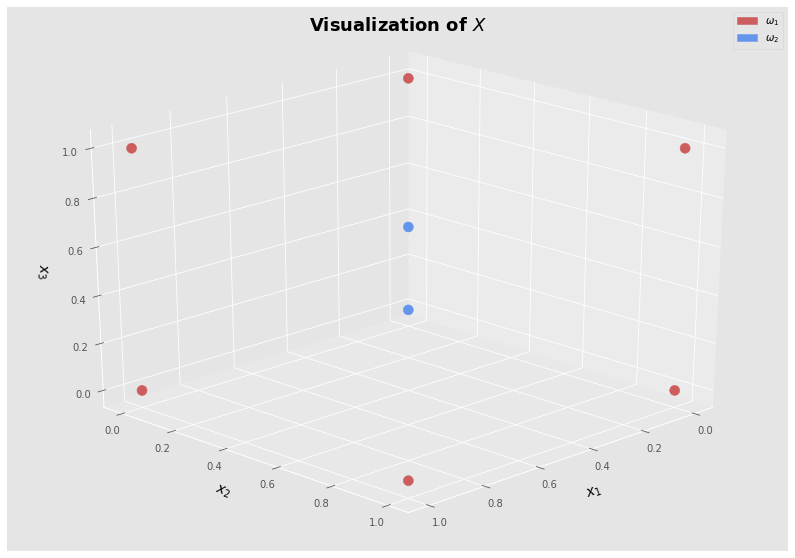

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches

# Plot
fig, ax = plt.subplots(figsize = (14, 10), sharey = True)
ax = plt.axes(projection = "3d")
ax.view_init(elev = 25, azim = 45)

# Plot observations
color = ["indianred" if c == 0 else "cornflowerblue" for c in y]
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = color, s = 100, marker = "o", alpha = 1)

# Set plot title
ax.set_title("Visualization of $X$", fontdict = plot_main_title_font, pad = 20)

# Set plot axis labels
ax.set_xlabel(r"$x_{1}$", fontdict = plot_axis_title_font, labelpad = 10)
ax.set_ylabel(r"$x_{2}$", fontdict = plot_axis_title_font, labelpad = 10)
ax.set_zlabel(r"$x_{3}$", fontdict = plot_axis_title_font, labelpad = 10)

# Set plot legend
label_y_0 = patches.Patch(color = "indianred", label = "$\omega_{1}$")
label_y_1 = patches.Patch(color = "cornflowerblue", label = "$\omega_{2}$")
ax.legend(handles = [label_y_0, label_y_1])

pass;

Proceeding by contradiction, we hypothesize that the classes are linearly separable, therefore there exists a hyperplane separating the two class of the form

$$
\begin{align}
g(\boldsymbol{x}) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{x} + \theta_{3}x_{3} \tag{1}
\end{align}
$$

The above implies that 

$$
g(\boldsymbol{x}) \geq 0, \forall x \in \omega_{1}
$$ 

and 

$$
g(\boldsymbol{x}) \lt 0, \forall x \in \omega_{2}
$$

We proceed by substituting $x \in \omega_{1}$ in $\textbf{(1)}$:

$$
g(\begin{bmatrix} 1 & 1 & 1 \end{bmatrix}^{T}) \geq 0 \implies 
\theta_{0} + \theta_{1} + \theta_{2} + \theta_{3} \geq 0 \tag{2}
$$

$$
g(\begin{bmatrix} 0 & 0 & 0 \end{bmatrix}^{T}) \geq 0 \implies
\theta_{0} \geq 0 \tag{3}
$$

Substituting $x \in \omega_{2}$ in $\textbf{(1)}$ we get:

$$
g(\begin{bmatrix} 0 & 0 & 1 \end{bmatrix}^{T}) \lt 0 \implies
\theta_{0} + \theta_{3} \lt 0 \tag{4}
$$

$$
g(\begin{bmatrix} 0 & 1 & 0 \end{bmatrix}^{T}) \lt 0 \implies
\theta_{0} + \theta_{2} \lt 0 \tag{5}
$$

$$
g(\begin{bmatrix} 1 & 0 & 0 \end{bmatrix}^{T}) \lt 0 \implies
\theta_{0} + \theta_{1} \lt 0 \tag{6}
$$

We are therefore presented with a system of inequalities that must satisfy $g(\boldsymbol{x})$, if our hypothesis is to hold.

Noticing that we can add $\textbf{(4)}$, $\textbf{(5)}$ and $\textbf{(6)}$, we get

$$
\theta_{0} + \theta_{1} + \theta_{0} + \theta_{2} + \theta_{0} + \theta_{3} \lt 0 \implies
$$

$$
3\theta_{0} + \theta_{1} + \theta_{2} + \theta_{3} \lt 0 \implies
$$

$$
-3\theta_{0} - \theta_{1} - \theta_{2} - \theta_{3} \gt 0 \tag{7}
$$

By $\textbf{(2)}$ and $\textbf{(7)}$ we also get:

$$
-2\theta_{0} \gt 0 \implies
$$

$$
\theta_{0} \lt 0 \tag{8}
$$

We note that $\textbf{(8)}$ clearly contradicts $\textbf{(3)}$. Therefore, the equations cannot hold and we arrive to the conclusion, by contrdiction, that no hyperplane exists such that the classes are linearly separable.

---

## Exercise 4

### Answer (i)

We define the following data points, in accordance with the problem definition:

In [17]:
# Boundaries
x_1_min, x_1_max = -10, 10
x_2_min, x_2_max = -10, 13

# Lines
# x_{1} = 0
epsilon_1_x_1 = np.repeat(0, 100)
epsilon_1_x_2 = np.linspace(x_2_min, x_2_max, 100)

# x_{2} = 0
epsilon_2_x_1 = np.linspace(x_1_min, x_1_max, 100)
epsilon_2_x_2 = np.repeat(0, 100)

# x_{1} + x_{2} = 2 => x_{1} = 2 - x_{1}
epsilon_3_x_1 = np.linspace(x_1_min, x_1_max, 100)
epsilon_3_x_2 = 2 - epsilon_3_x_1

# Random points for class 1 (uniformly distributed)
class_1_x = np.random.uniform(x_1_min, x_1_max, 5000)
class_1_y = np.random.uniform(x_2_min, x_2_max, 5000)
#class_1_y_idx = np.where((class_1_y > 2 - class_1_x) | ( (class_1_x < 0) & (class_1_y < 2 - class_1_x) ) | ( (class_1_y < 0) & (class_1_y < 2 - class_1_x) ) )
class_1_y_idx = np.where(
    # 1st quadrant
    ( 
        (class_1_y > 2 - class_1_x) & (class_1_x > 0) & (class_1_y > 0) 
    ) 
    |
    # 3rd quadrant
    (
        (class_1_x < 0) & (class_1_y < 0)
    )
)
class_1_x_idx = [class_1_y_idx]

class_1_x = class_1_x[tuple(class_1_x_idx)]
class_1_y = class_1_y[(class_1_y_idx)]


# Random points for class 0 (uniformly distributed)
class_2_x = np.random.uniform(x_1_min, x_1_max, 5000)
class_2_y = np.random.uniform(x_2_min, x_2_max, 5000)
class_2_y_idx = np.where(
    # 1st quadrant
    (
        (class_2_y < 2 - class_2_x) & (class_2_x > 0) & (class_2_y > 0)
    ) 
    |
    # 2nd quadrant
    (
        (class_2_y > 2 - class_2_x) & (class_2_y < 0)
    ) 
    |
    (
        (class_2_y < 2 - class_2_x) & (class_2_x > 0) & (class_2_y < 0)
    ) 
    |
    # 4th quadrant
    (
        (class_2_y < 2 - class_2_x) & (class_2_x < 0) & (class_2_y > 0)
    )
    |
    (
        (class_2_y > 2 - class_2_x) & (class_2_x < 0) & (class_2_y > 0)
    )
)
class_2_x_idx = [class_2_y_idx]

class_2_x = class_2_x[tuple(class_2_x_idx)]
class_2_y = class_2_y[tuple(class_2_y_idx)]

Plot of the lines and data points in two-dim space:

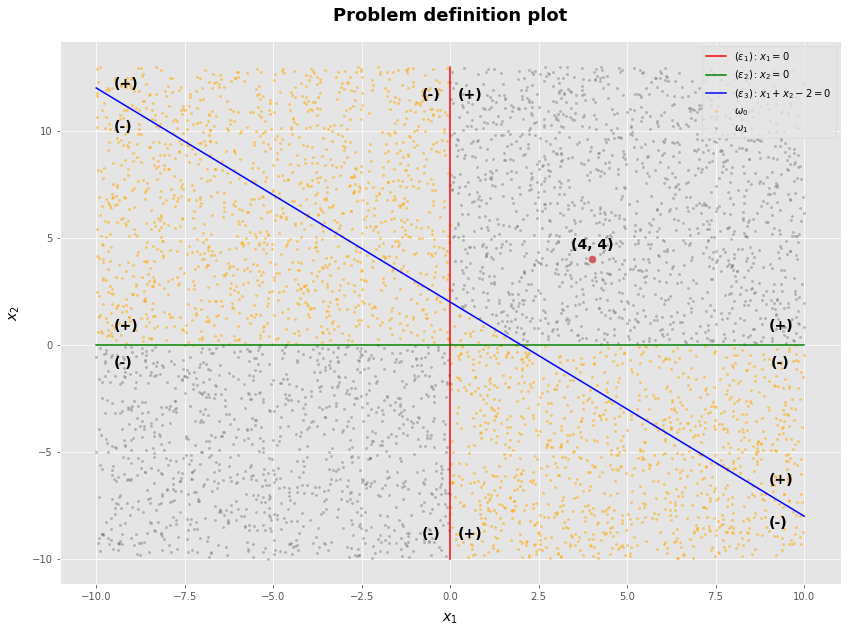

In [18]:
# Plot
fig, ax = plt.subplots(figsize = (14, 10))

ax.plot(epsilon_1_x_1, epsilon_1_x_2, "r-", label = "$(\epsilon_{1}): x_{1} = 0$")
ax.plot(epsilon_2_x_1, epsilon_2_x_2, "g-", label = "$(\epsilon_{2}): x_{2} = 0$")
ax.plot(epsilon_3_x_1, epsilon_3_x_2, "b-", label = "$(\epsilon_{3}): x_{1} + x_{2} - 2 = 0$")

# Point (4, 4)
ax.scatter(4, 4, c = "indianred", s = 50, alpha = 1)

# Class 0
ax.scatter(class_2_x, class_2_y, c = "orange", s = 5, alpha = 0.5, label = "$\omega_{0}$")

# Class 1
ax.scatter(class_1_x, class_1_y, c = "grey", s = 5, alpha = 0.5, label = "$\omega_{1}$")

# Lines
# epsilon_1
ax.text(0.2, 11.5, "(+)", fontdict = plot_axis_title_font)
ax.text(-0.8, 11.5, "(-)", fontdict = plot_axis_title_font)
ax.text(0.2, -9, "(+)", fontdict = plot_axis_title_font)
ax.text(-0.8, -9, "(-)", fontdict = plot_axis_title_font)


# epsilon_2
ax.text(9, 0.7, "(+)", fontdict = plot_axis_title_font)
ax.text(9.05, -1, "(-)", fontdict = plot_axis_title_font)
ax.text(-9.5, 0.7, "(+)", fontdict = plot_axis_title_font)
ax.text(-9.5, -1, "(-)", fontdict = plot_axis_title_font)

# epsilon_3
ax.text(-9.5, 12, "(+)", fontdict = plot_axis_title_font)
ax.text(-9.5, 10, "(-)", fontdict = plot_axis_title_font)
ax.text(9, -6.5, "(+)", fontdict = plot_axis_title_font)
ax.text(9, -8.5, "(-)", fontdict = plot_axis_title_font)

# Point (4, 4)
ax.text(3.4, 4.5, "(4, 4)", fontdict = plot_axis_title_font)

# Set graph labels
ax.set_xlabel("$x_{1}$", fontdict = plot_axis_title_font, labelpad = 10)
ax.set_ylabel("$x_{2}$", fontdict = plot_axis_title_font, labelpad = 10)

# Set graph title
ax.set_title("Problem definition plot", fontdict = plot_main_title_font, pad = 20)

plt.legend()

pass;

### Answer (ii)

We observe that the space is partitioned by three lines. We shall therefore adopt a **three-layer perceptron**. We chose a 3-node first hidden layer as dictated by the lines $\epsilon_{1}$, $\epsilon_{2}$ and $\epsilon_{3}$. The choice of number of nodes indicates the space in which we transform the original 2-dim space and that is in 3-dim. Therefore, we transpose the problem to a higher dimensional space, in which data points are transposed to a cube (a hypercube in general). Now, the problem becomes one of finding hyperplanes that separates the points in the 3-dim space.

The first hidden layer of our neural network maps the 2-dim space to a 3-dim hypercube, following the rule of "polarity" of points falling to either side of the lines separating our initial space, as shown below:

![Hidden layer 1 transformation](hidden_layer_1_transformation.jpg)

We observe that classes $\omega_{0}$ and $\omega_{2}$ can only be separated by two hyperplanes. Therefore, we shall employ a second, 2-node hidden layer for this purpose with neurons $h_{4}$ and $h_{5}$, as shown below:

![Hidden layer 2 decision hyperplanes](hidden_layer_2_decision_hyperplanes.jpg)

The third and final transformation of space will occur at the third hidden layer, as depicted below:

![Hidden layer 3 transformation](hidden_layer_3_decision_hyperplane.jpg)

The neurons of the first hidden layer are defined by the following equations:

$$
\epsilon_{1} \rightarrow h_{1}(x) \rightarrow x_{2} = 0, \theta_{10} = 0 \rightarrow \theta_{11} = 0, \theta_{12} = 1
$$

$$
\epsilon_{2} \rightarrow h_{2}(x) \rightarrow x_{1} = 0, \theta_{20} = 0 \rightarrow \theta_{21} = 1, \theta_{22} = 0
$$

$$
\epsilon_{3} \rightarrow h_{3}(x) \rightarrow x_{1} + x_{2} - 2 = 0 \rightarrow \theta_{30} = -2, \theta_{31} = 1, \theta_{32} = 1
$$

The neurons of the second hidden layer are defined by the following equations:

$$
h_{3}(x) \rightarrow 2x_{1} + 2x_{2} + 2x_{3} - 1 = 0
$$

with solution

$$
\boldsymbol{\theta} = 
\begin{bmatrix}
    1 & 0.125 & 0.125 & 0.25 
\end{bmatrix}^{T}
$$

and

$$
h_{4}(x) \rightarrow 2x_{1} + 2x_{2} + 2x_{3} - 5 = 0
$$

with solution

$$
\boldsymbol{\theta} = 
\begin{bmatrix}
    -5 & 1 & 1 & 0.5 
\end{bmatrix}^{T}
$$

Finally, the last layer neuron is defined by:
    
$$
y = x_{2} = 0, \theta_{10} = 0, \theta_{11} = 0, \theta_{12} = 1
$$

$$
\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}  = 0 
$$

which is easy to show that is satisfied by

$$
\boldsymbol{\theta} = 
\begin{bmatrix}
    -0.5 & 1 & 1 
\end{bmatrix}^{T}
$$

The proposed neural network architecture is shown below:

![Neural network architecture](neural_network.jpg)

---

## Exercise 5

Load data set:

In [19]:
import scipy.io as sio

In [20]:
Dataset_a = sio.loadmat("HW9a.mat")

train_x_a = Dataset_a["train_X"]
train_y_a = Dataset_a["train_y"]
test_x_a = Dataset_a["test_X"]
test_y_a = Dataset_a["test_y"]

In [21]:
def make_meshgrid(x, y, h = 0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    
    return out


'''
    Computes a random grid of parameters for a SciKit Learn SVM classifier.
'''
def svm_params_grid(n_params, kernel, n_features, max_C = 20, max_degree = 10, max_gamma = 100, shuffle = True):
    C = np.linspace(0.1, max_C, n_params)
    
    if kernel == "linear":
        degree = np.repeat(None, n_params)
        gamma = np.repeat(None, n_params)
        
    if kernel == "poly":
        degree = np.linspace(2, max_degree, n_params, dtype = np.int32)
            
        # Default in SciKit Learn is 1 / n_features
        gamma = np.linspace(0.1, max_gamma, n_params)
        
    if kernel == "rbf":
        degree = np.linspace(2, max_degree, n_params, dtype = np.int32)
        
        # Default in SciKit Learn is 1 / n_features
        gamma = np.linspace(0.1, max_gamma, n_params)
        
    if shuffle == True:
        np.random.shuffle(C)
        np.random.shuffle(degree)
        np.random.shuffle(gamma)
        
    return np.vstack([C, degree, gamma])
    
    
'''
'''    
def svm_fit(train_X, train_y, kernel = "linear", C = 1.0, degree = 3, gamma = "auto"):
    from sklearn import svm
    
    svm_clf = svm.SVC(kernel = kernel, C = C, gamma = gamma, degree = degree)
    svm_clf_fitted = svm_clf.fit(train_X, train_y)
    
    return svm_clf_fitted



'''
''' 
def svm_plot(train_X, train_y, runs = 10, max_C = 20, max_degree = 10, max_gamma = 100, shuffle_params = True, kernel = "linear"):
    # Retrieve matrix of parameters
    params = svm_params_grid(runs, kernel, train_X.shape[0], max_C = max_C, max_degree = max_degree, max_gamma = max_gamma, shuffle = shuffle_params)

    # Number of plot columns
    plot_cols = 2
    plot_rows = np.ceil(runs / plot_cols).astype(np.int32)

    # Axis counters
    ax_1 = 0
    ax_2 = 0

    # Setup the plot
    fig, ax = plt.subplots(nrows = plot_rows, ncols = plot_cols, figsize = (15, 25))
    
    fig.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = None, hspace = 0.7)
    
    for i in range(0, runs):
        #print("iter:", str(i), "kernel:", kernel, "C:", params[0, i], "degree:", params[1, i], "gamma:", params[2, i])
        
        if kernel == "linear":
            svm_clf_fitted = svm_fit(train_X = train_X, train_y = train_y, kernel = kernel, C = params[0, i])
        
        if kernel == "poly":
            svm_clf_fitted = svm_fit(train_X = train_X, train_y = train_y, kernel = kernel, C = params[0, i], degree = params[1, i], gamma = params[2, i])
        
        if kernel == "rbf":
            svm_clf_fitted = svm_fit(train_X = train_X, train_y = train_y, kernel = kernel, C = params[0, i], degree = params[1, i], gamma = params[2, i])
            
        if(i > 1 and i % plot_cols == 0):
            ax_1 += 1
        ax_2 = (i % plot_cols)

        X00, X11 = train_x_a[:, 0], train_x_a[:, 1]
        xx, yy = make_meshgrid(X00, X11)

        color = ["indianred" if l == -1 else "cornflowerblue" for l in train_y_a.reshape(270)]
        plot_contours(ax[ax_1, ax_2], svm_clf_fitted, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.6)
        ax[ax_1, ax_2].scatter(X00, X11, c = color, cmap = plt.cm.coolwarm, s = 30, edgecolors = "face")

        # Set graph title
        if kernel == "linear":
            ax[ax_1, ax_2].set_title(label = "C = " + str(np.round(params[0, i], 5)), loc = "center", fontdict = plot_main_title_font, pad = 10)
            
        if kernel == "poly":
            ax[ax_1, ax_2].set_title(label = "C = " + str(np.round(params[0, i], 5)) + "\n" + "degree = " + str(np.round(params[1, i], 5)) + "\n" + "gamma = " + str(np.round(params[2, i], 5)), loc = "center", fontdict = plot_main_title_font, pad = 10)

        if kernel == "rbf":
            ax[ax_1, ax_2].set_title(label = "C = " + str(np.round(params[0, i], 5)) + "\n" + "degree = " + str(np.round(params[1, i], 5)) + "\n" + "gamma = " + str(np.round(params[2, i], 5)), loc = "center", fontdict = plot_main_title_font, pad = 10)
        
        # Set plot axis labels
        ax[ax_1, ax_2].set_xlabel(r"$x_{1}$", fontdict = plot_axis_title_font, labelpad = 10)
        ax[ax_1, ax_2].set_ylabel(r"$x_{2}$", fontdict = plot_axis_title_font, labelpad = 10)

        # Set plot legend
        label_y_0 = patches.Patch(color = "indianred", label = "$\omega_{1}$")
        label_y_1 = patches.Patch(color = "cornflowerblue", label = "$\omega_{2}$")
        ax[ax_1, ax_2].legend(handles = [label_y_0, label_y_1])
    
    plt.show()
    
    pass;

The ``C`` parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of ``C``, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower ``C`` will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words ``C`` behaves as a regularization parameter in the SVM.

When ``gamma`` is very small, the model is too constrained and cannot capture the complexity or "shape" of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes.

(source: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html).

### Answer (a)

Using the **linear kernel**:

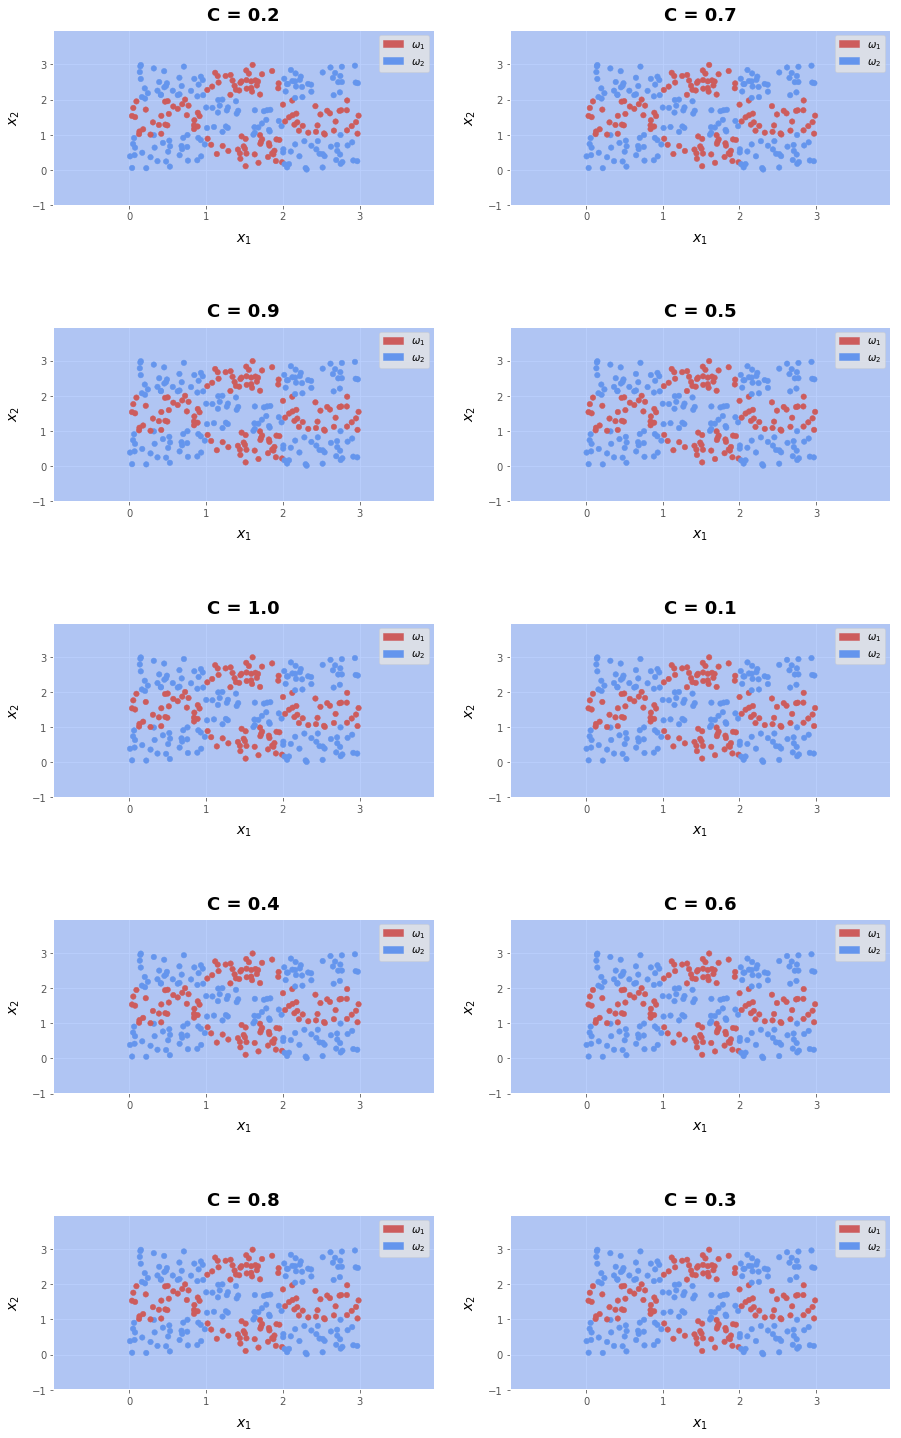

In [22]:
svm_plot(
    train_X = train_x_a, 
    train_y = train_y_a.reshape(270), 
    runs = 10, 
    max_C = 1, 
    shuffle_params = True,
    kernel = "linear"
)

We observe that the linear separability assumption leads to the SVM algorithm not being able to find desicion hyperplanes. This is to be expected, since the classes are not linearly separable. The linear kernel is clearly unsuitable for classification of this data set as it cannot come up with appropriate decision boundaries in the 2-dim space.

### Answer (b)

Using the **polynomial kernel**:

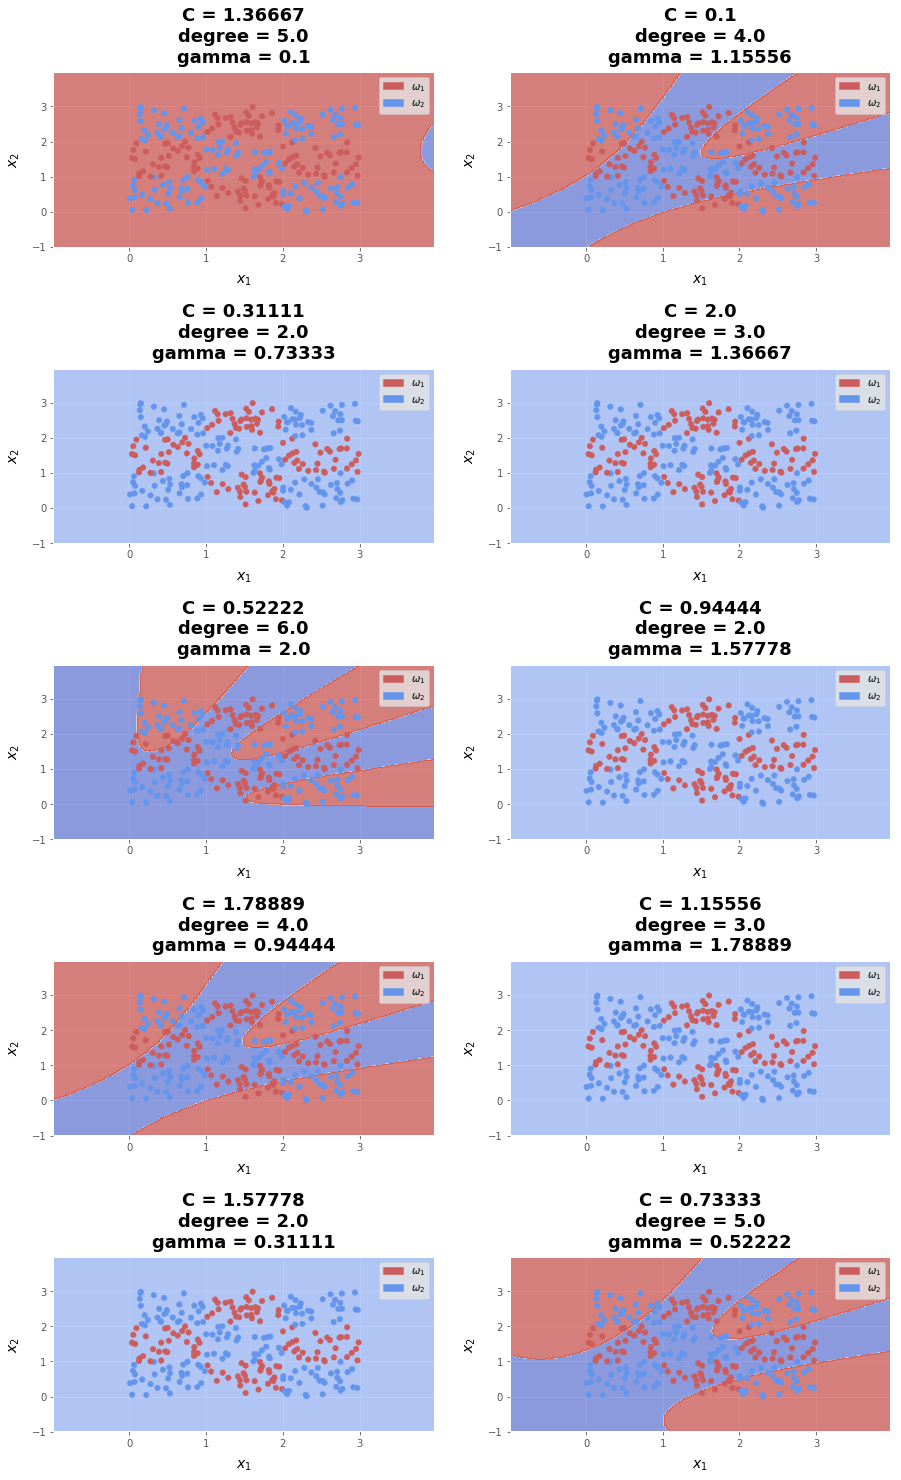

In [23]:
###
# Warning
##
# Setting C to a large enough value (>10) is computationaly expensive
# Setting poly order to a large enough value (>6) is computationaly expensive
# Setting gamma to a large enough value (>20) is computationaly expensive
svm_plot(
    train_X = train_x_a, 
    train_y = train_y_a.reshape(270), 
    runs = 10, 
    max_C = 2, 
    max_degree = 6, 
    max_gamma = 2, 
    shuffle_params = True, 
    kernel = "poly"
)

We observe that the polynomial kernel is able to fit a polynomial decision boundary which performs reasonably well in separating the classes. Observe that with very low values for ``gamma``, the classifier behaves as if a linear kernel is used.

### Answer (c)

Using the **rbf kernel**:

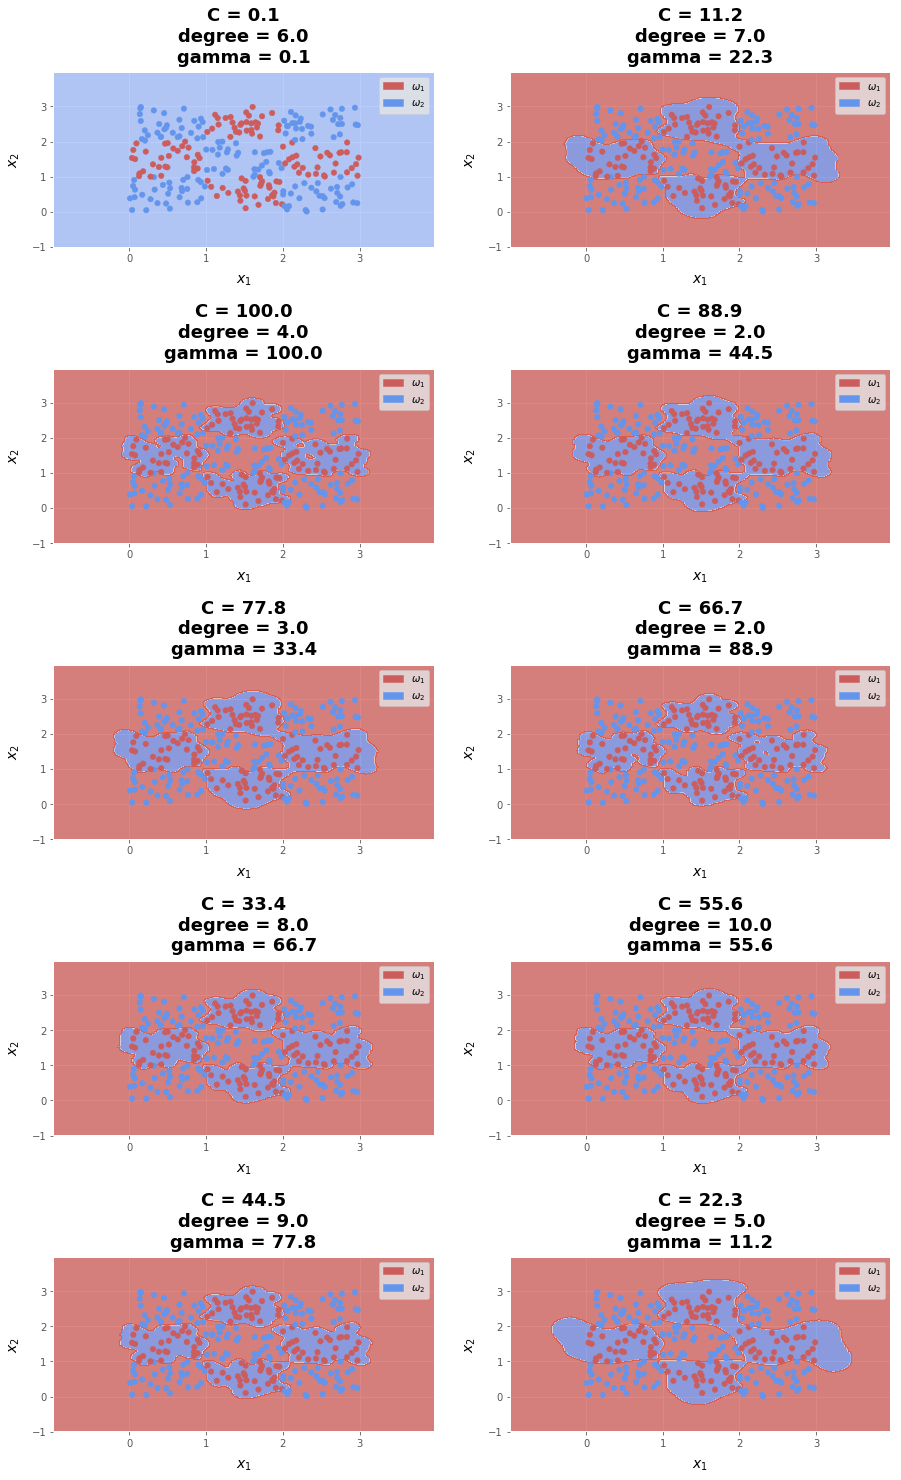

In [24]:
svm_plot(
    train_X = train_x_a, 
    train_y = train_y_a.reshape(270), 
    runs = 10, 
    max_C = 100, 
    max_gamma = 100, 
    shuffle_params = True,
    kernel = "rbf"
)

The RBF kernel appears to be best in estimating decision boundaries.

---

## Exercise 6

In [25]:
import scipy.io as sio

In [26]:
Dataset_b = sio.loadmat("HW9b.mat")

train_x_b = Dataset_b["train_X"]
train_y_b = Dataset_b["train_y"]
test_x_b = Dataset_b["test_X"]
test_y_b = Dataset_b["test_y"]

In [27]:
def make_meshgrid(x, y, h = 0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx, yy



def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    
    return out



def nn_fit(train_X, train_y, hidden_layer_sizes, activation = "tanh"):
    from sklearn.neural_network import MLPClassifier
    
    nn_clf = MLPClassifier(solver = "lbfgs", alpha = 1e-3, hidden_layer_sizes = hidden_layer_sizes, activation = activation, random_state = 19730618)
    nn_clf_fitted = nn_clf.fit(train_X, train_y)
    
    return nn_clf_fitted



def nn_plot(nn_clf_fitted):
    # Plot
    fig, ax = plt.subplots(figsize = (14, 8))

    X00, X11 = train_x_b[:, 0], train_x_b[:, 1]
    xx, yy = make_meshgrid(X00, X11)

    color = ["indianred" if l == -1 else "cornflowerblue" for l in train_y_b.reshape(180)]
    plot_contours(ax, nn_clf_fitted, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.6)
    ax.scatter(X00, X11, c = color, cmap = plt.cm.coolwarm, s = 50, edgecolors = "white")
    
    ax.set_title(label = "NN with single " + str(nn_clf_fitted.get_params()["hidden_layer_sizes"][0]) + "-node hidden layer", loc = "center", fontdict = plot_main_title_font, pad = 10)
    
    # Set plot axis labels
    ax.set_xlabel(r"$x_{1}$", fontdict = plot_axis_title_font, labelpad = 10)
    ax.set_ylabel(r"$x_{2}$", fontdict = plot_axis_title_font, labelpad = 10)

    # Set plot legend
    label_y_0 = patches.Patch(color = "indianred", label = "$\omega_{1}$")
    label_y_1 = patches.Patch(color = "cornflowerblue", label = "$\omega_{2}$")
    ax.legend(handles = [label_y_0, label_y_1])
    
    plt.show()

### Answer (a)

Using a **3-node NN**:

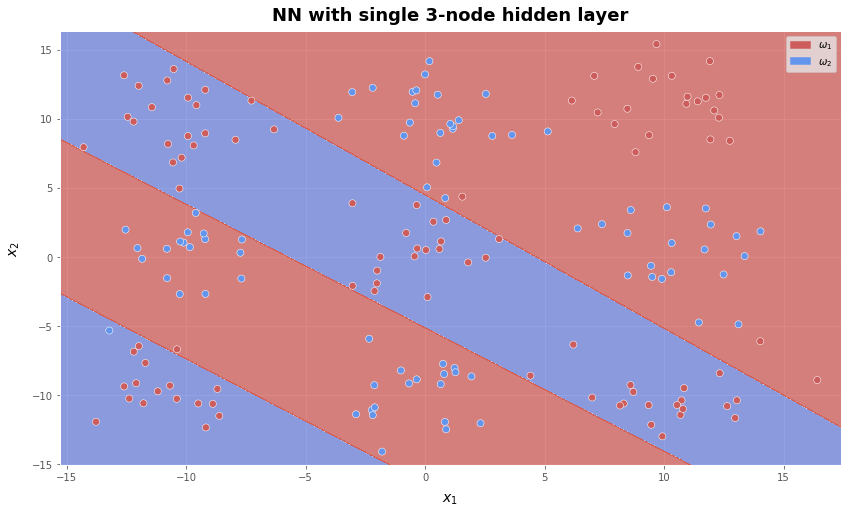

In [28]:
nn_clf_3_fitted = nn_fit(train_x_b, train_y_b.reshape(180), (3, ), activation = "tanh")
nn_plot(nn_clf_3_fitted)

#### Classifier score

In [29]:
nn_clf_3_fitted_score = nn_clf_3_fitted.score(X = test_x_b, y = test_y_b)

nn_score_df = pd.DataFrame([
    [nn_clf_3_fitted_score]
], columns = ["Mean accuracy (3-node NN)"])
nn_score_df

,Mean accuracy (3-node NN)
0,0.838889


---

### Answer (b)

Using a **4-node NN**:

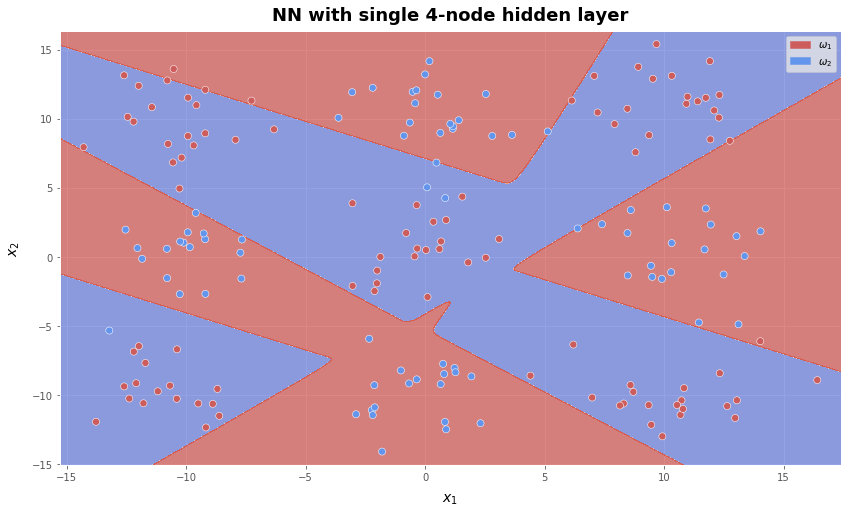

In [30]:
nn_clf_4_fitted = nn_fit(train_x_b, train_y_b.reshape(180), (4, ), activation = "tanh")
nn_plot(nn_clf_4_fitted)

#### Classifier score

In [31]:
nn_clf_4_fitted_score = nn_clf_4_fitted.score(X = test_x_b, y = test_y_b)

nn_score_df = pd.DataFrame([
    [nn_clf_4_fitted_score]
], columns = ["Mean accuracy (4-node NN)"])
nn_score_df

,Mean accuracy (4-node NN)
0,0.922222


---

### Answer (c)

Using a **10-node NN**:

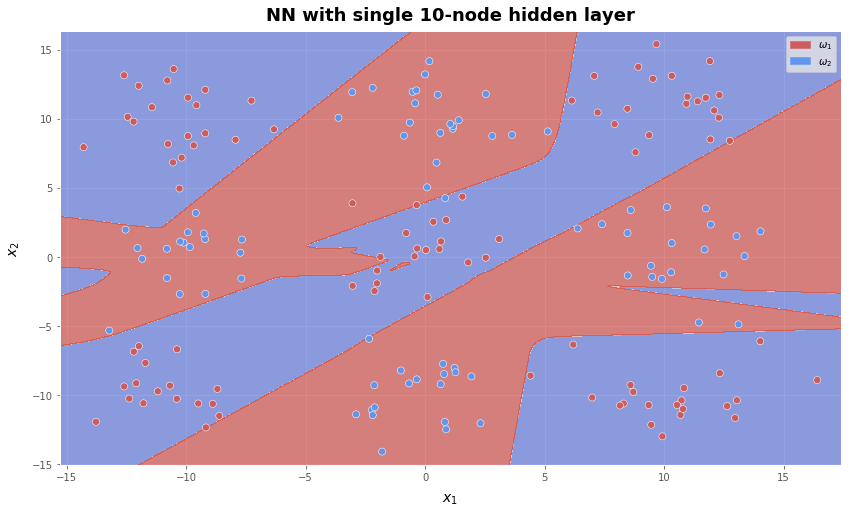

In [32]:
nn_clf_10_fitted = nn_fit(train_x_b, train_y_b.reshape(180), (10, ), activation = "tanh")
nn_plot(nn_clf_10_fitted)

#### Classifier score

In [33]:
nn_clf_10_fitted_score = nn_clf_10_fitted.score(X = test_x_b, y = test_y_b)\

nn_score_df = pd.DataFrame([
    [nn_clf_10_fitted_score]
], columns = ["Mean accuracy (10-node NN)"])
nn_score_df

,Mean accuracy (10-node NN)
0,0.911111


---

### Answer (d)

Using a **50-node NN**:

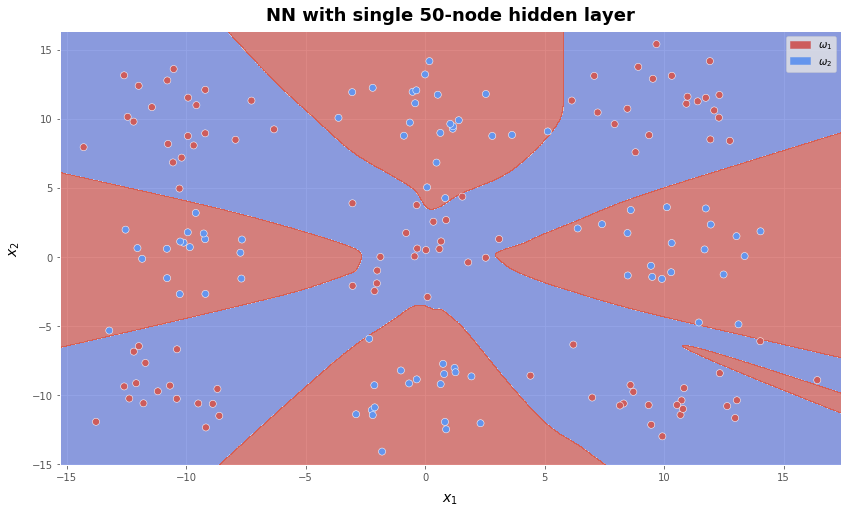

In [34]:
nn_clf_50_fitted = nn_fit(train_x_b, train_y_b.reshape(180), (50, 3), activation = "tanh")
nn_plot(nn_clf_50_fitted)

#### Classifier score

In [35]:
nn_clf_50_fitted_score = nn_clf_50_fitted.score(X = test_x_b, y = test_y_b)

nn_score_df = pd.DataFrame([
    [nn_clf_50_fitted_score]
], columns = ["Mean accuracy (50-node NN)"])
nn_score_df

,Mean accuracy (50-node NN)
0,0.977778


We observe that the more neurons we place at each iteration, we are able to make the neural network estimate decision boundaries with more degrees of freedom. The increase in accuracy is particularly noticeable going from a 3-node to a 4-node layer, which increases the linear desicion boundaries by just 1, albeit with a major performance increase. Increasing the number of neurons we get better performance. This however should reach a plateau when we will start observing overfitting problems. 

---